In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import glob

In [3]:
# randomly read each class audio file

folder_name = './dataset/train/'

classes = ['bass', 'brass', 'flute', 'guitar', 'keyboard', 'mallet', 'organ', 'reed', 'string','vocal']

Y = []
sr = 22050
for instrument in classes:
    file_name = folder_name + instrument+ '*.wav'
    filename = glob.glob(file_name)
    n_files = len(filename)
    random_sample = np.random.randint(n_files)
    y, sr = librosa.load(filename[random_sample])
    Y.append(y)
    ipd.display(ipd.Audio(y, rate=sr))

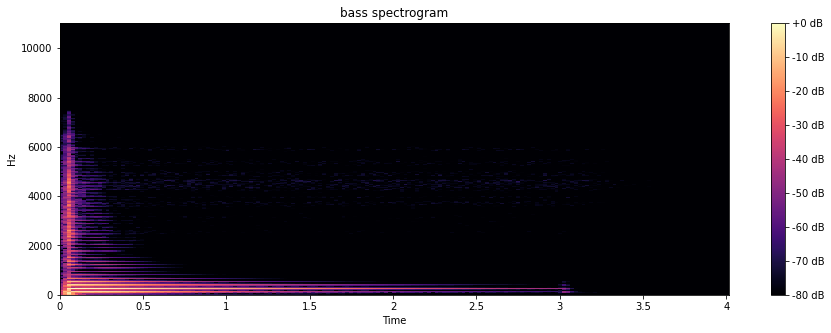

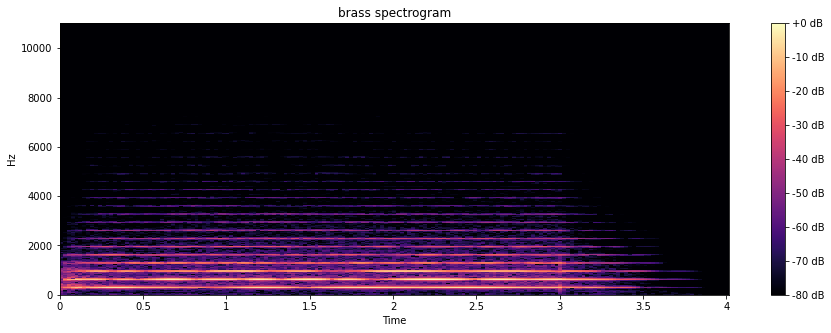

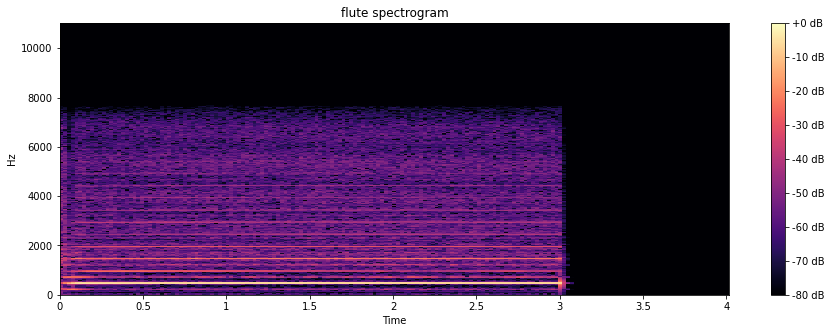

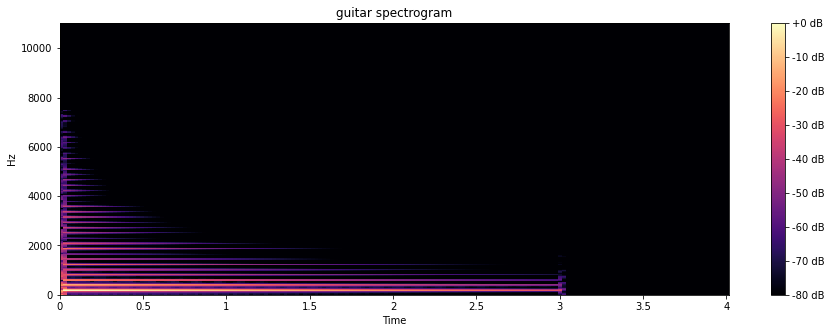

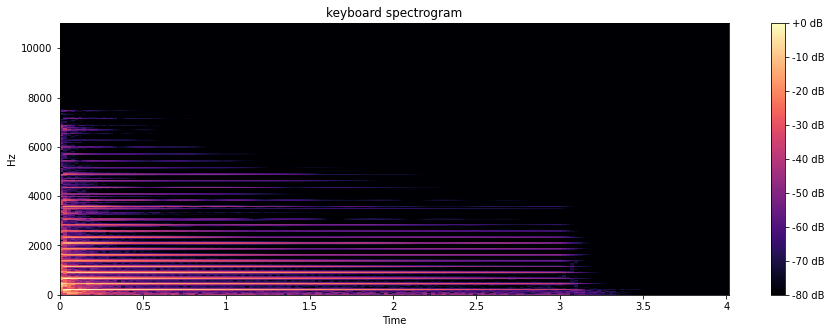

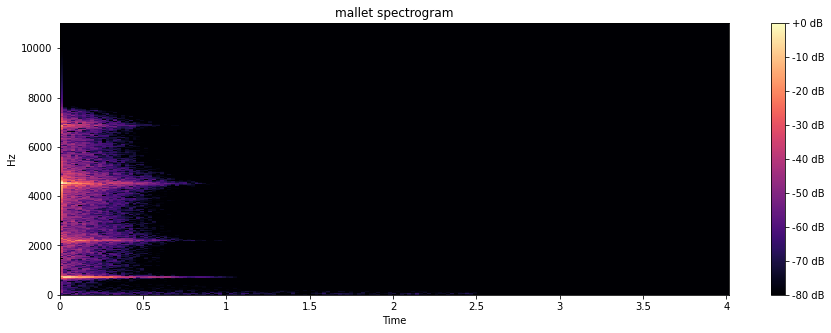

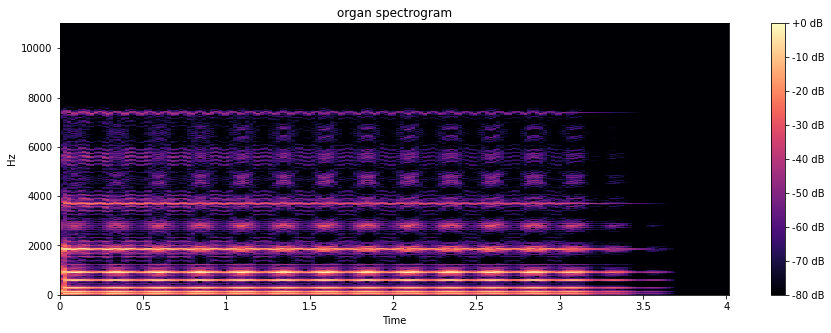

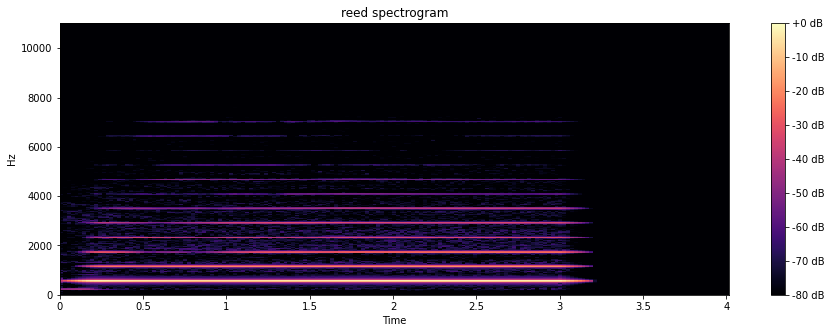

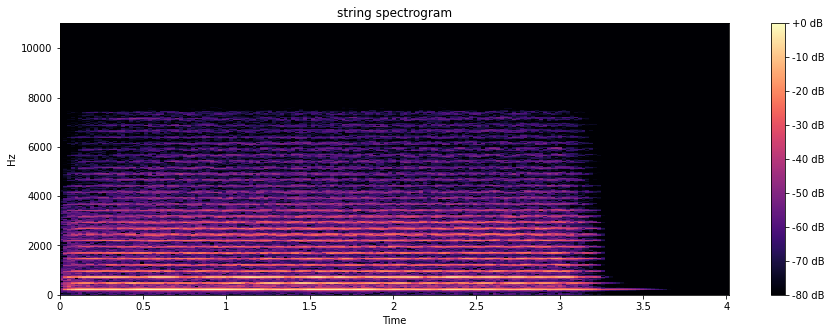

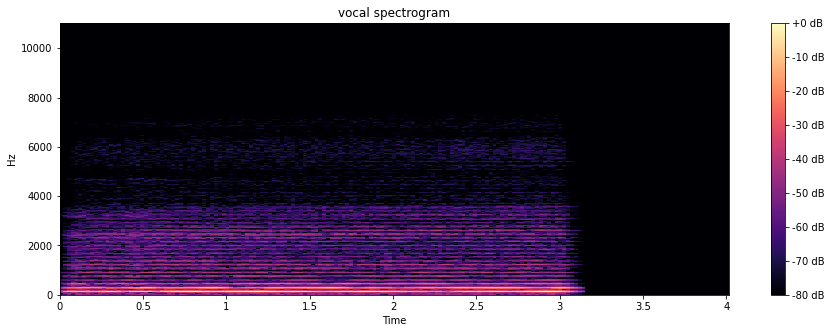

In [4]:
D = []
D_dB = []

i = 0
for y in Y:
    # spectrogram
    d = np.abs(librosa.stft(y, hop_length = 512, n_fft = 1024)
    d_dB = librosa.amplitude_to_db(d, ref=np.max)
    D.append(d)
    D_dB.append(d_dB)
    # display spectrogram
    fig, ax = plt.subplots(sharex=True, figsize=(15,5))
    img = librosa.display.specshow(d_dB, x_axis='time', y_axis='linear', ax=ax)
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    title_str = classes[i]+' spectrogram'
    ax.set(title=title_str)
    i = i + 1


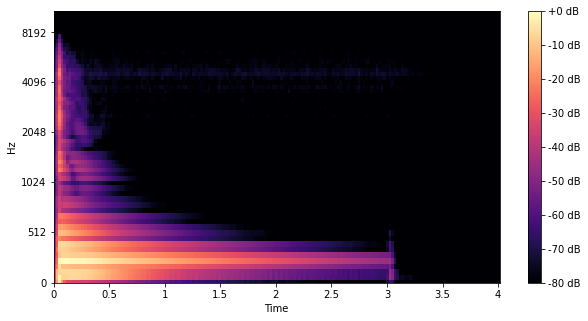

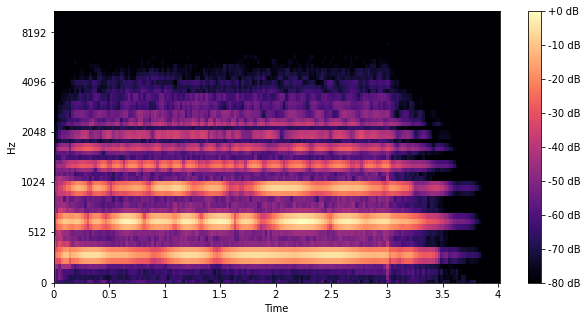

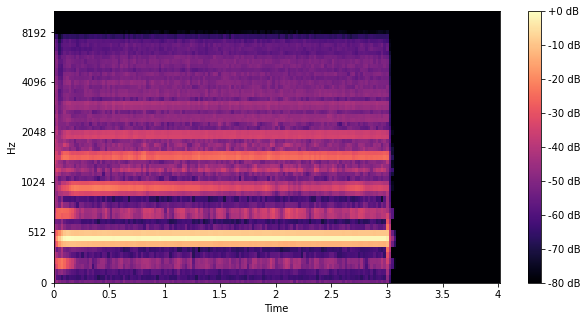

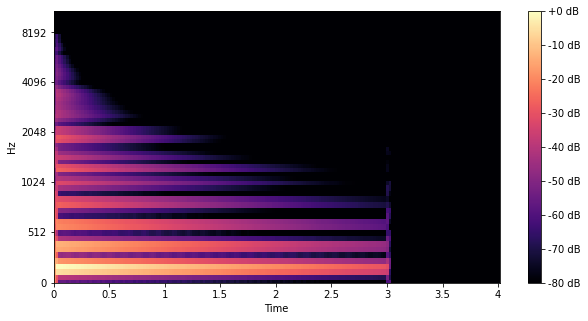

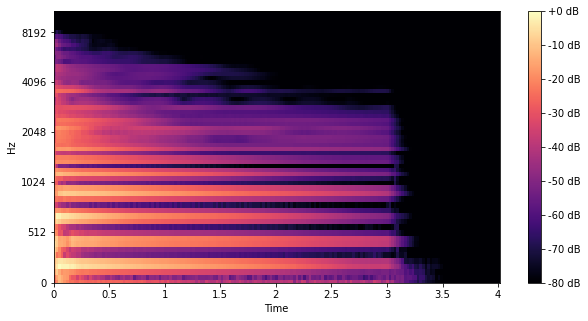

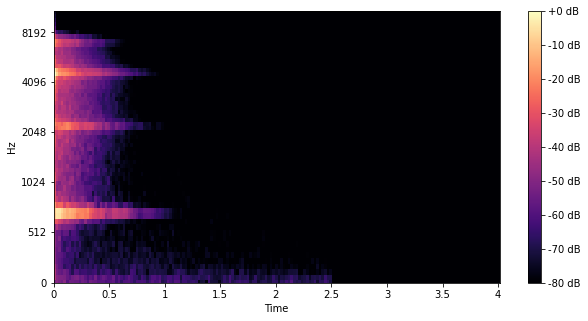

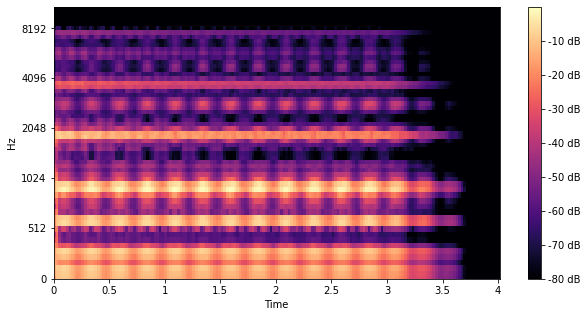

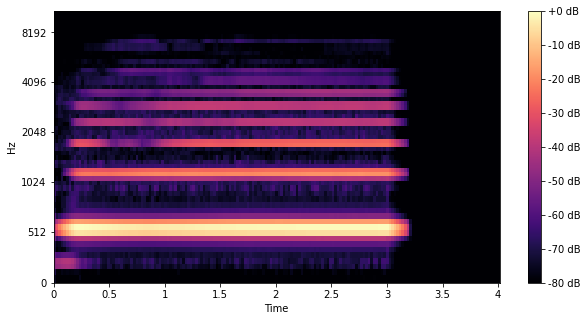

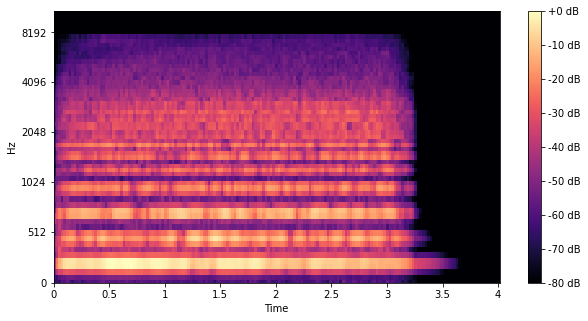

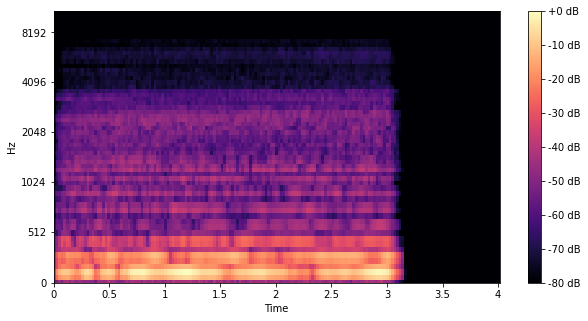

In [11]:
i = 0
for y in Y:
    ### Mel-spectrogram
    hop_length = 512
    n_fft = 1024

    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))**2   # Power spectrum is the default  
    S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=60) # 128 mel bins is the default

    plt.figure(figsize=(10, 5))
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    title_str = classes[i]+' Mel-spectrogram'
    ax.set(title=title_str)
    i = i + 1

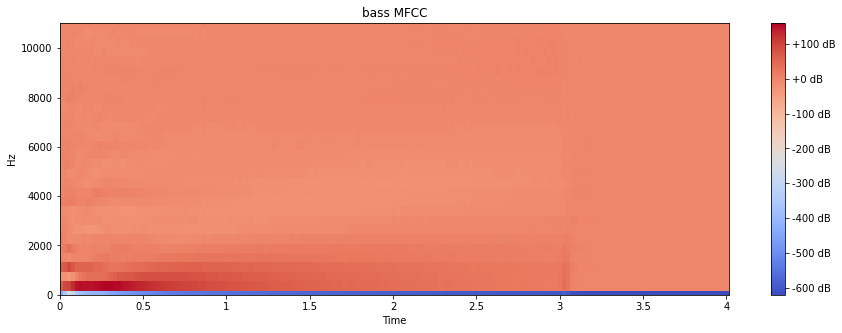

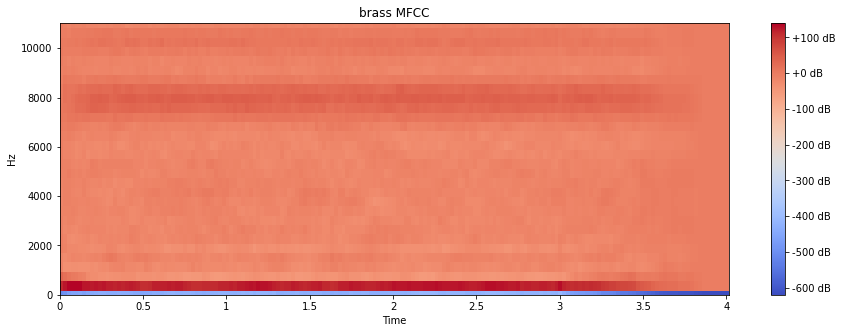

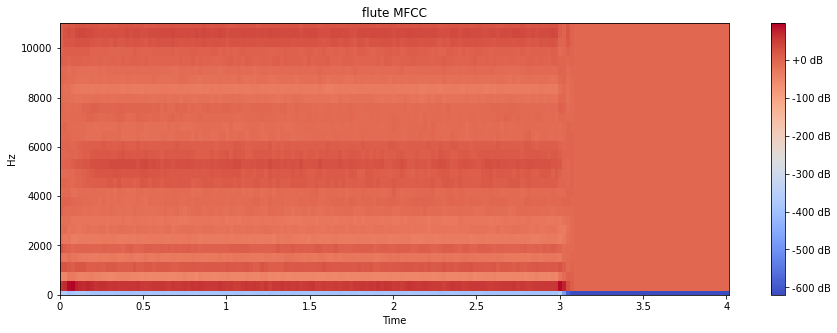

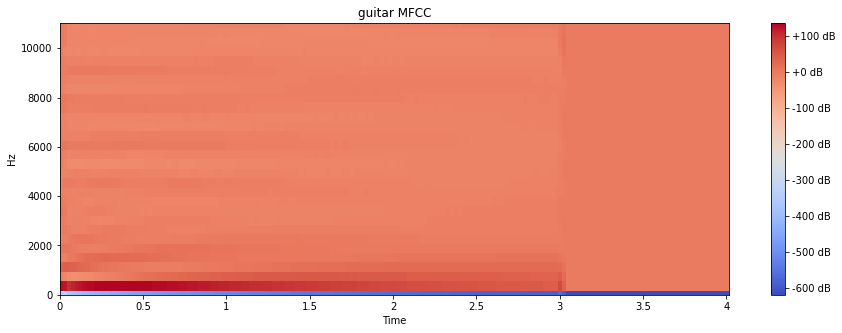

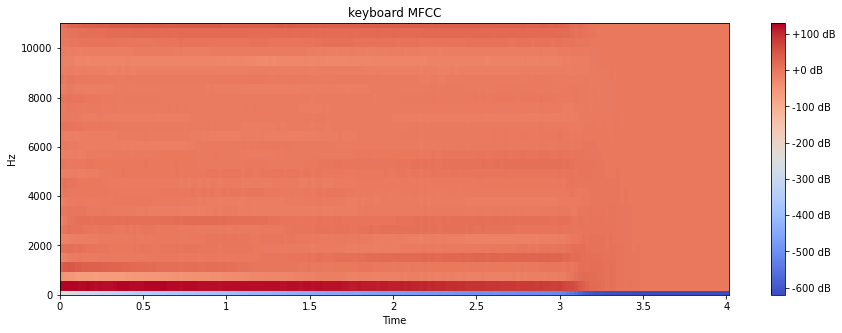

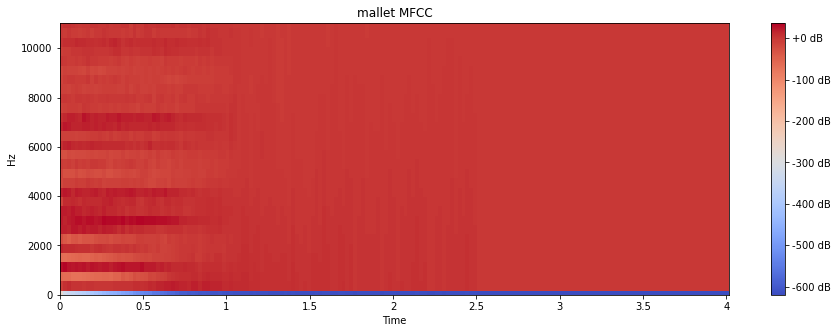

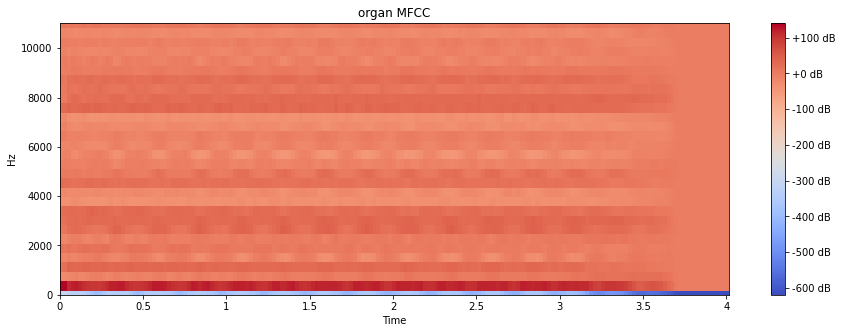

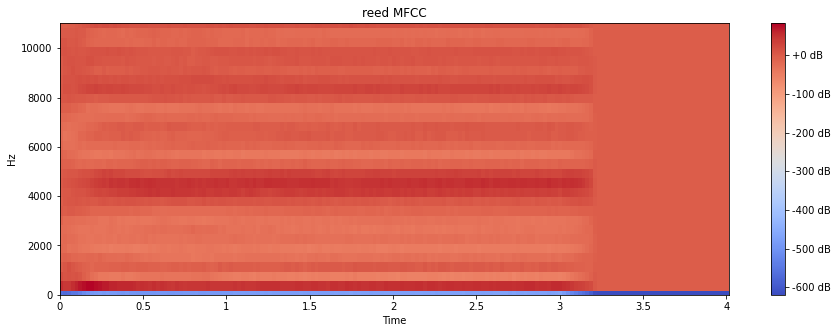

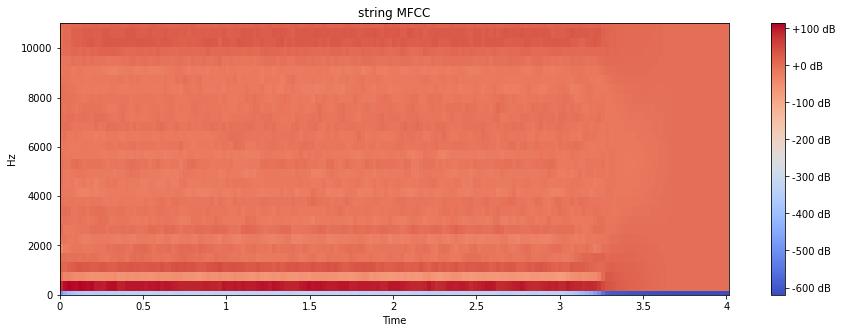

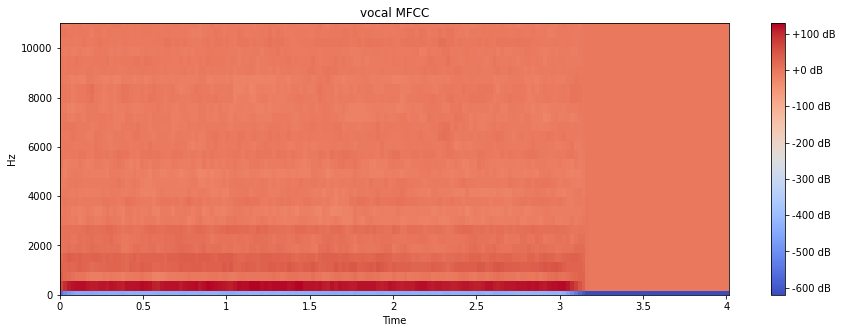

In [13]:
i = 0
for y in Y:
    ### Mel-spectrogram
    hop_length = 512
    n_fft = 1024

    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))**2   # Power spectrum is the default  
    S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=60) # 128 mel bins is the default
    S_dB = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=30)
    # display spectrogram
    fig, ax = plt.subplots(sharex=True, figsize=(15,5))
    img = librosa.display.specshow(mfcc, x_axis='time', y_axis='linear', ax=ax)
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    title_str = classes[i]+' MFCC'
    ax.set(title=title_str)
    i = i + 1

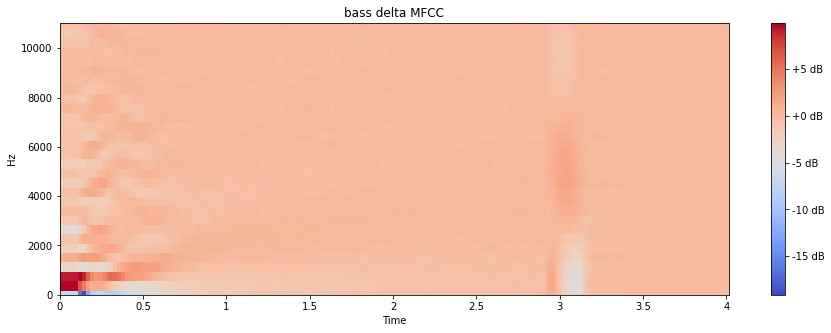

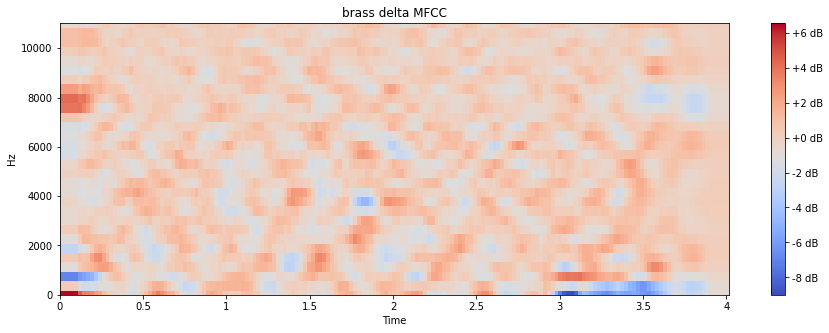

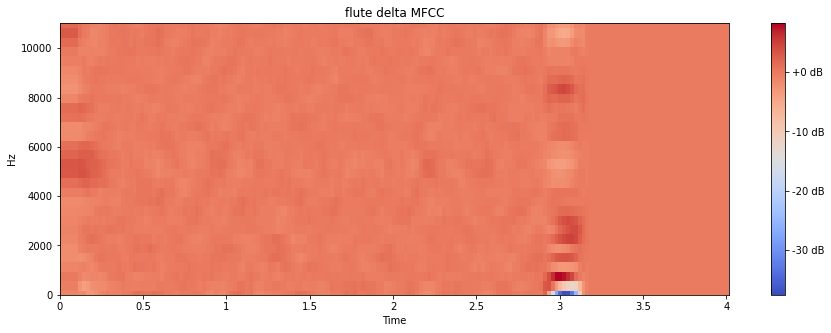

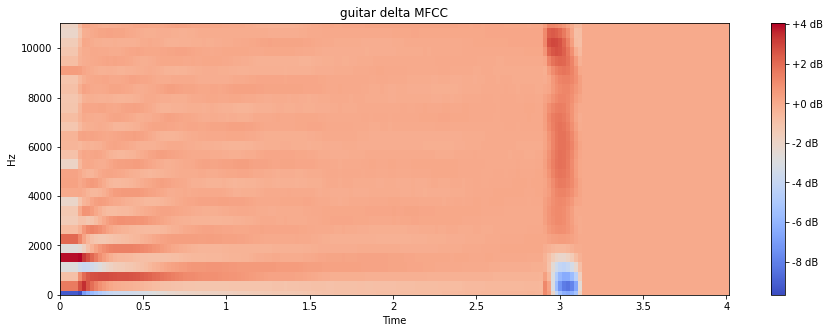

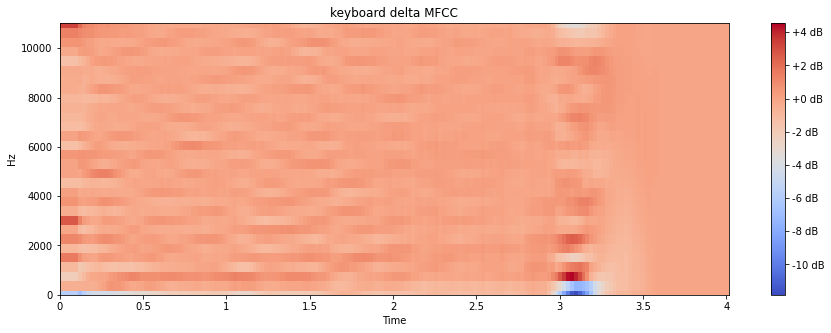

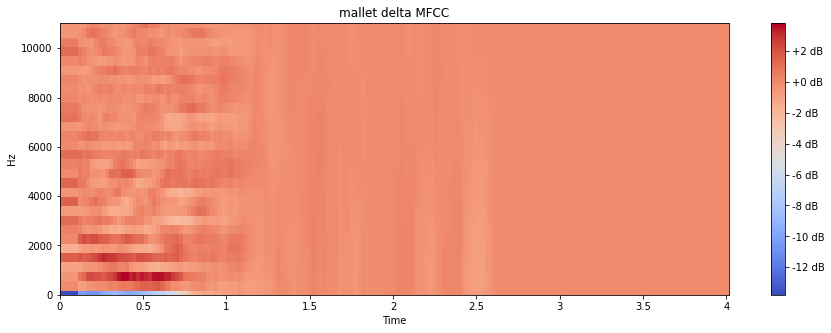

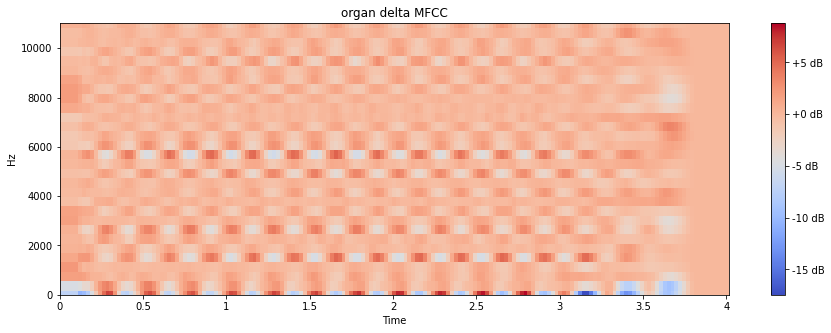

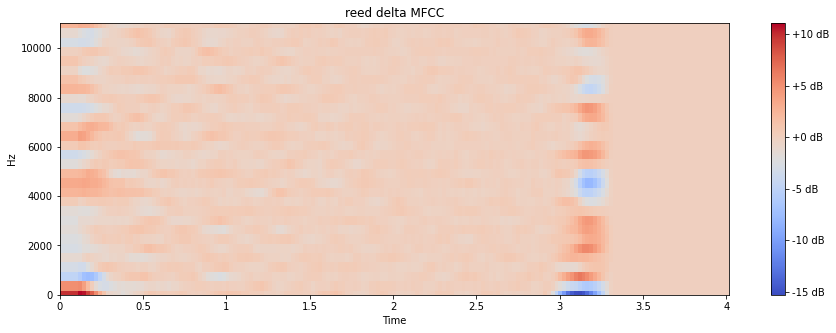

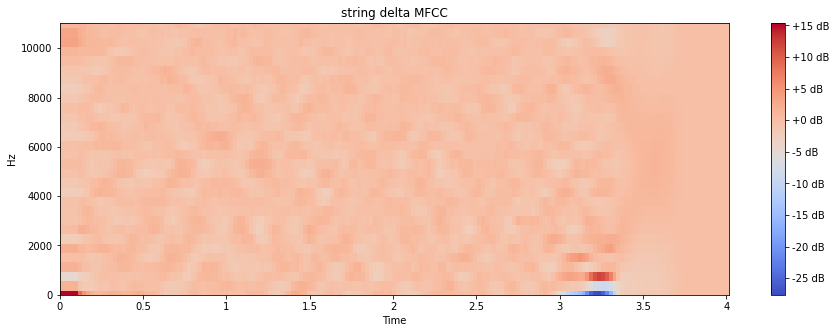

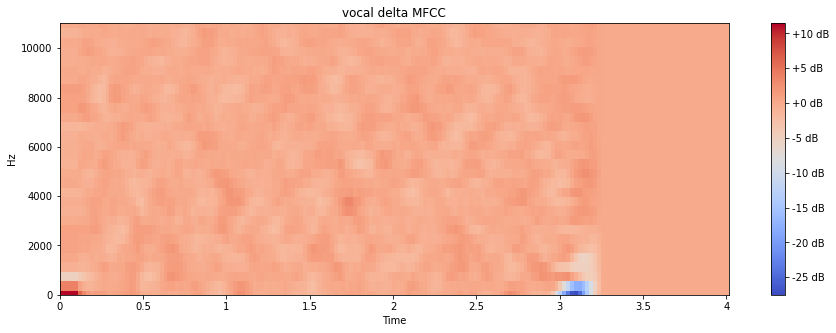

In [17]:
i = 0
for y in Y:
    ### Mel-spectrogram
    hop_length = 512
    n_fft = 1024

    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))**2   # Power spectrum is the default  
    S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=60) # 128 mel bins is the default
    S_dB = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=30)
    # delta mfcc
    delta_mfcc = librosa.feature.delta(mfcc)
    
    # display spectrogram
    fig, ax = plt.subplots(sharex=True, figsize=(15,5))
    img = librosa.display.specshow(delta_mfcc, x_axis='time', y_axis='linear', ax=ax)
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    title_str = classes[i]+' delta MFCC'
    ax.set(title=title_str)
    i = i + 1



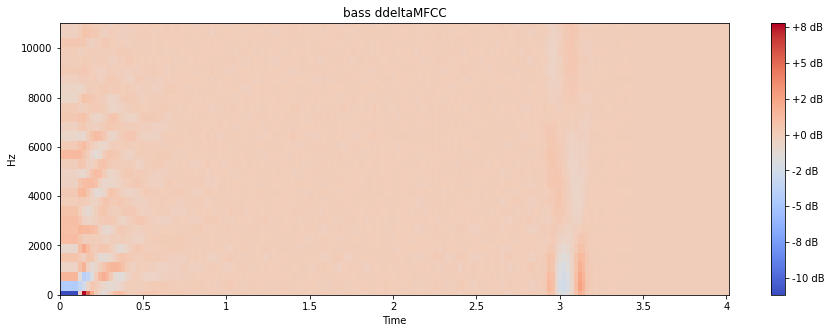

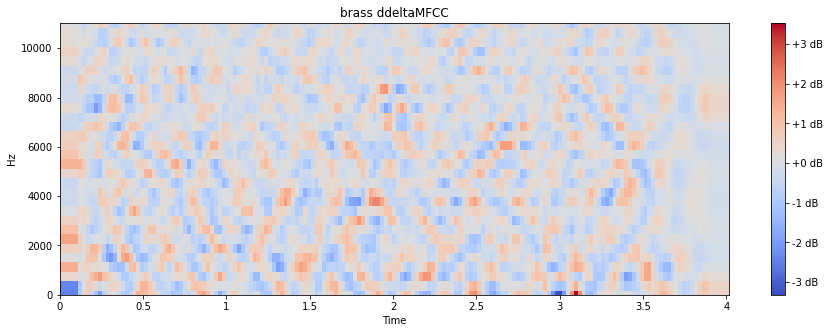

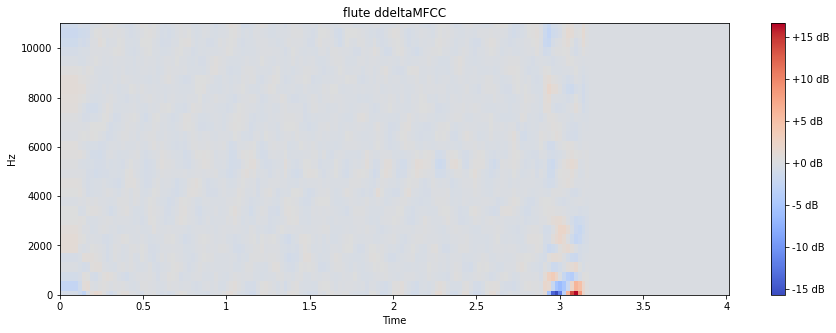

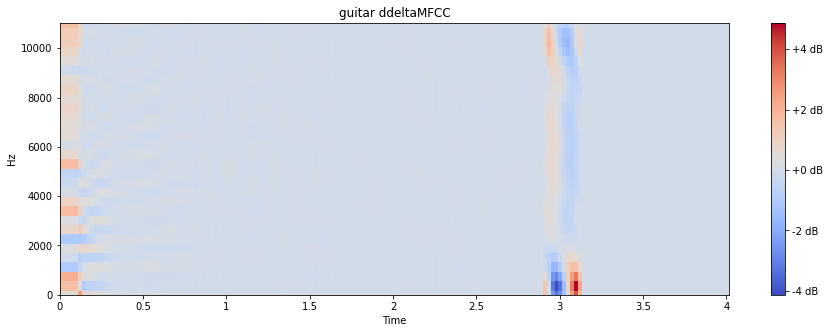

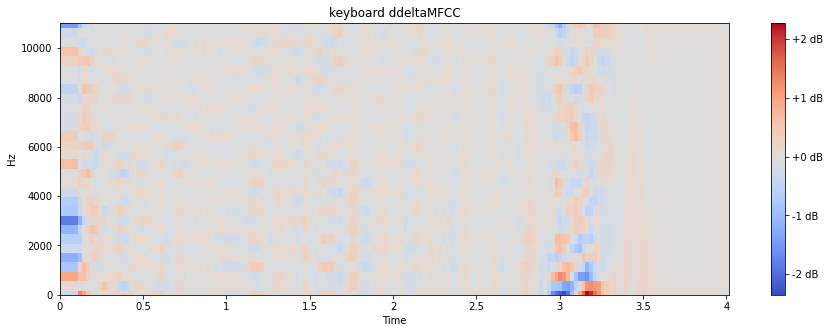

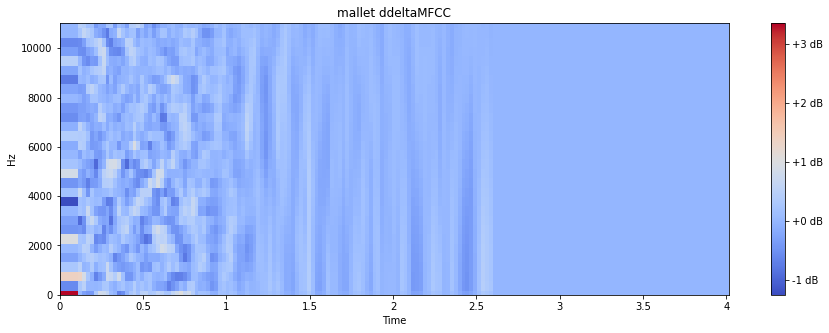

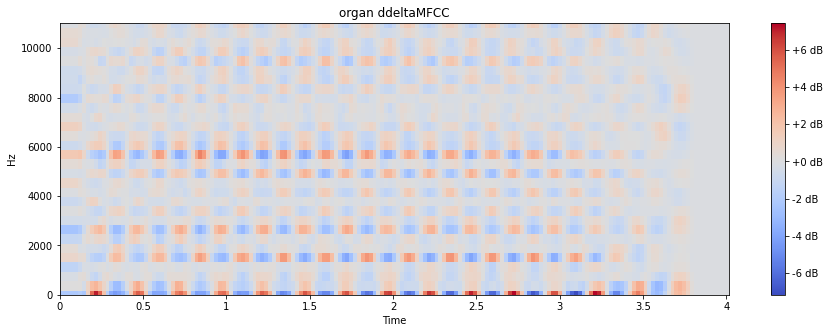

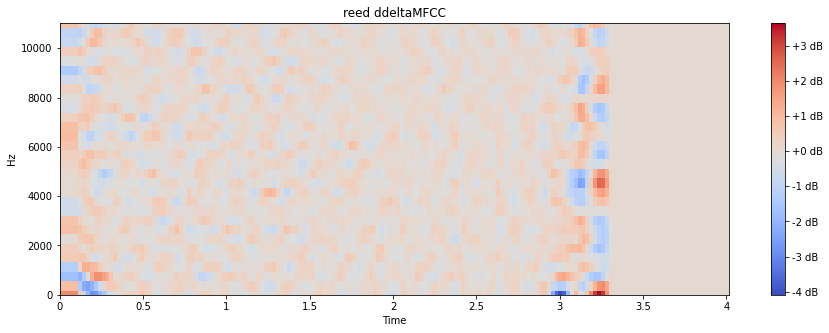

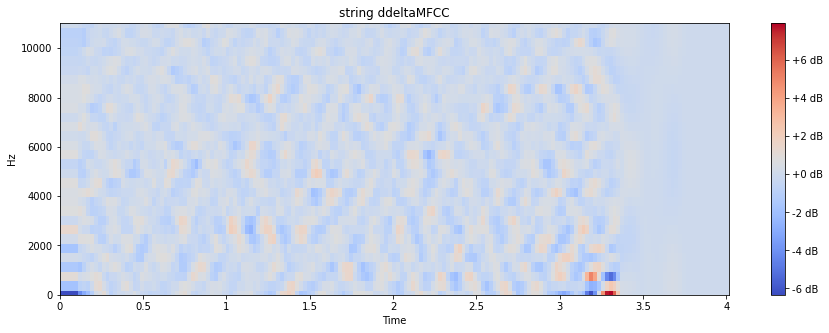

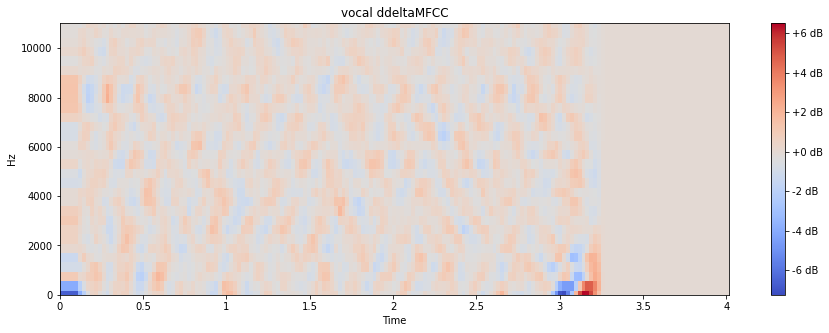

In [16]:
i = 0
for y in Y:
    ### Mel-spectrogram
    hop_length = 512
    n_fft = 1024

    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))**2   # Power spectrum is the default  
    S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=60) # 128 mel bins is the default
    S_dB = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=30)
    # delta mfcc
    ddelta_mfcc = librosa.feature.delta(mfcc, order=2)
    
    # display spectrogram
    fig, ax = plt.subplots(sharex=True, figsize=(15,5))
    img = librosa.display.specshow(ddelta_mfcc, x_axis='time', y_axis='linear', ax=ax)
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    title_str = classes[i]+' ddeltaMFCC'
    ax.set(title=title_str)
    i = i + 1



[1157.90988706]
[636.29386801]
[441.92499374]
[183.89033669]
[496.50397119]
[707.23502651]
[775.9022419]
[486.25273599]
[447.32725541]
[155.44484869]


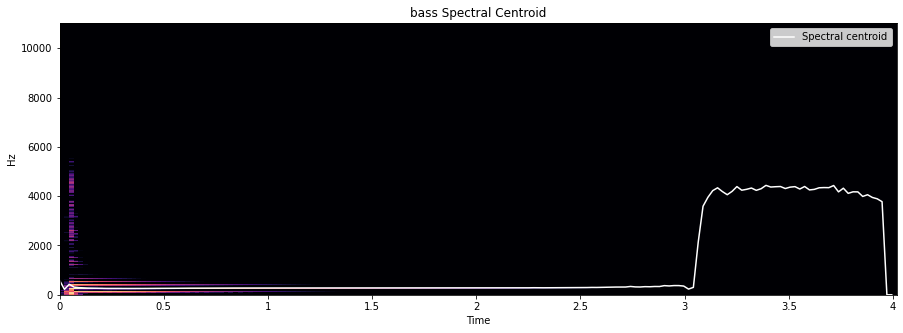

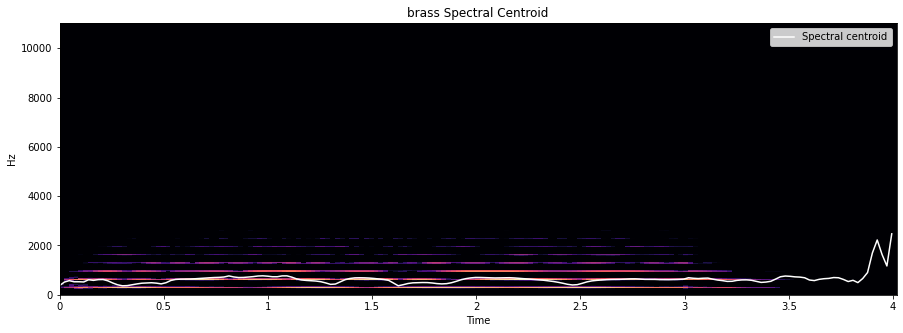

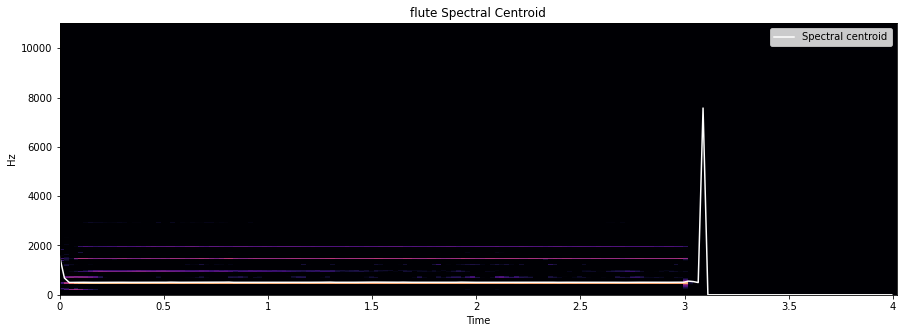

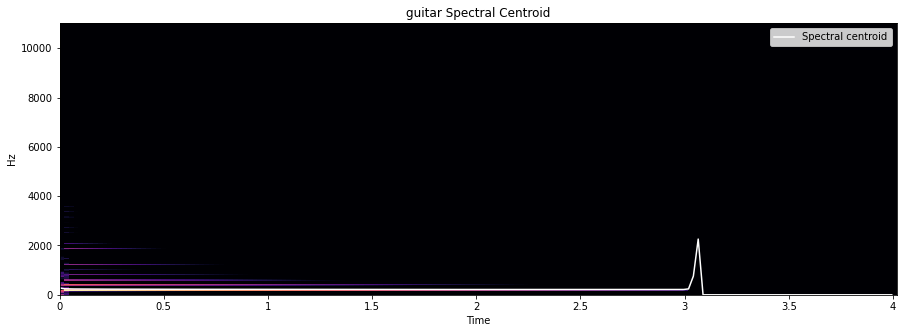

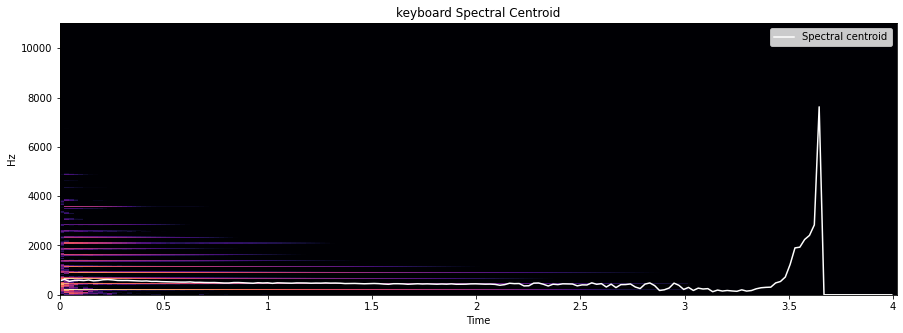

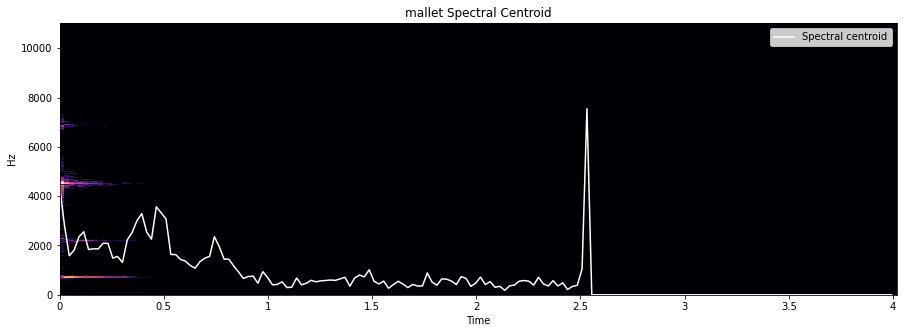

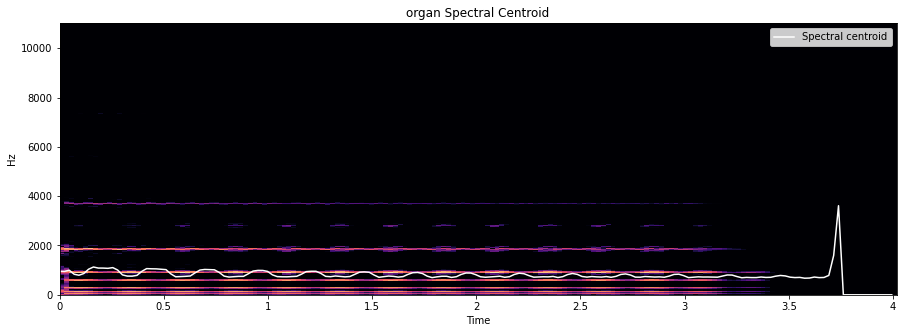

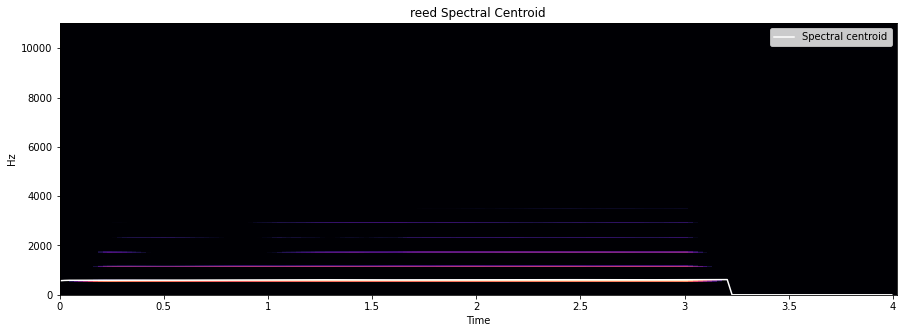

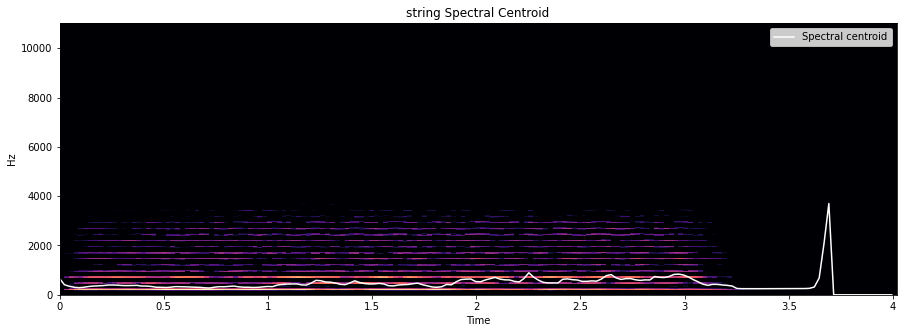

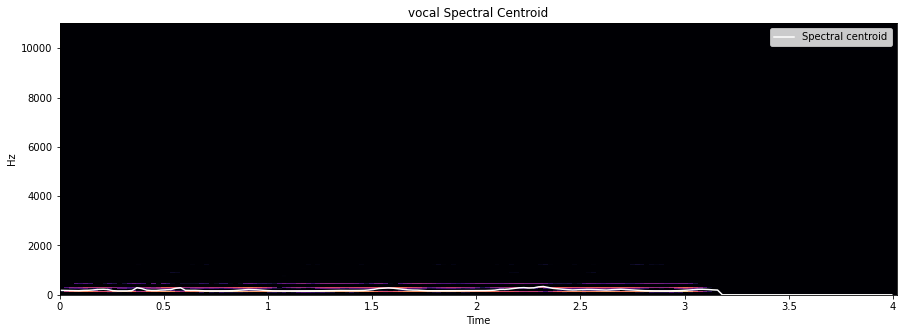

In [24]:
i = 0
for y in Y:
    ### Mel-spectrogram
    hop_length = 512
    n_fft = 1024

    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))**2   # Power spectrum is the default  
    D_dB = librosa.amplitude_to_db(D, ref=np.max)
    spec_centroid = librosa.feature.spectral_centroid(S=D)
    print(spec_centroid.mean(axis=1))
    times = librosa.times_like(spec_centroid)
    fig, ax = plt.subplots(sharex=True, figsize=(15,5))
    librosa.display.specshow(D_dB, x_axis='time', y_axis='linear', ax=ax)
    ax.plot(times, spec_centroid.T, label='Spectral centroid', color='w')
    ax.legend(loc='upper right')
    title_str = classes[i]+' Spectral Centroid'
    ax.set(title=title_str)
    i = i + 1

(173, 513)
[0.7982855  0.10496767 0.05166112]


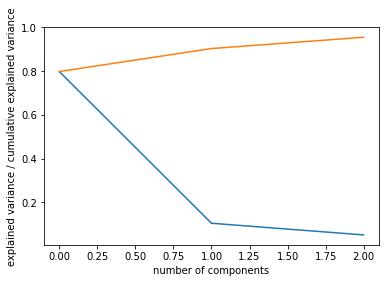

In [43]:
from sklearn.decomposition import PCA

y = Y[8]

S_full = np.abs(librosa.stft(y, n_fft=1024, window='hann', hop_length=512, win_length=1024))

# Check the shape of matrix: row must corresponds to the example index !!!
X = S_full.T
print (X.shape)

pca = PCA()
pca = PCA(n_components=50)
pca = PCA(0.95) # accumulated variances

#training
pca.fit(X)

print(pca.explained_variance_ratio_[:5])
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance / cumulative explained variance');

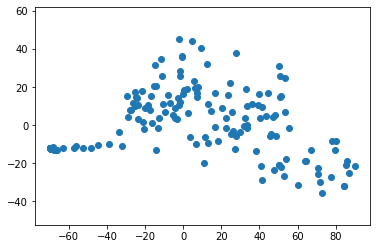

In [38]:
pca = PCA(n_components=2)

# training
pca.fit(X)
X_pca = pca.transform(X)

# display 
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.axis('equal');

(173, 513)
(173, 2)
(173, 513)


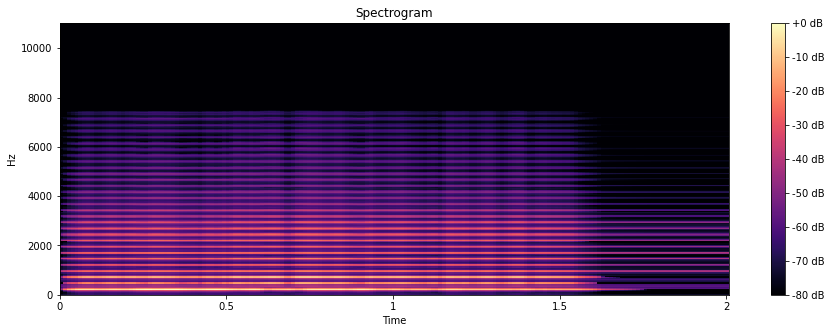

In [44]:
pca = PCA(0.9)
#print(pca.n_components)

# training
pca.fit(X)

# PCA transform 
X_pca = pca.transform(X)
print(X.shape)
print(X_pca.shape)

# reconstruction
X_recon = pca.inverse_transform(X_pca)
print(X_recon.shape)

# set negatives to zero 
X_recon[X_recon<0] = 0

X_recon = X_recon.T

# inverse STFT
n = len(y)
y_hat = librosa.istft(X_recon*np.exp(phase), window='hann', hop_length=256, win_length=1024, length=n)

fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(librosa.amplitude_to_db(X_recon,ref=np.max), hop_length=256, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram')

ipd.Audio(y_hat, rate=sr)

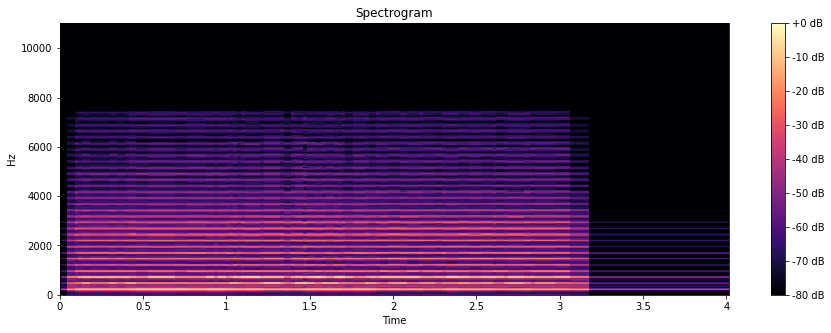

In [47]:
from sklearn.cluster import KMeans
# K-Means Clustering

K = 20
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

X_rec = np.zeros(X.shape)

for i in range(X.shape[0]):
    X_rec[i,:] = kmeans.cluster_centers_[kmeans.labels_[i]]

# back to the spectrogram shape
X_hat = X_rec.T

# inverse STFT
y_hat = librosa.istft(X_hat*np.exp(phase), window='hann', hop_length=256, win_length=1024, length=n)


fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(librosa.amplitude_to_db(X_hat,ref=np.max), x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram')

ipd.Audio(y_hat, rate=sr)


# input audio
folder_name = './dataset/train/'

classes = ['bass', 'brass', 'flute', 'guitar', 'keyboard', 'mallet', 'organ', 'reed', 'string','vocal']

for instrument in classes:
    file_name = folder_name + instrument+ '*.wav'
    filename = glob.glob(file_name)
    n_files = len(filename)
    random_sample = np.random.randint(n_files)
    y, sr = librosa.load(filename[random_sample]) 


    plt.figure(figsize=(12, 5))
    librosa.display.waveplot(y, sr=sr)


    # STFT
    S_full, phase = librosa.magphase(librosa.stft(y, n_fft=1024, window='hann', hop_length=256, win_length=1024))
    n = len(y)

    fig, ax = plt.subplots(sharex=True, figsize=(15,5))
    img = librosa.display.specshow(librosa.amplitude_to_db(S_full,ref=np.max), hop_length=256, x_axis='time', y_axis='linear', ax=ax)
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    ax.set(title='Spectrogram')

    # Check the shape of matrix: row must corresponds to the example index !!!
    X = S_full.T
    print (X.shape)


    ipd.display(ipd.Audio(y, rate=sr)) 
    
    
    # K-Means Clustering

    K = 10
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

    X_rec = np.zeros(X.shape)

    for i in range(X.shape[0]):
        X_rec[i,:] = kmeans.cluster_centers_[kmeans.labels_[i]]

    # back to the spectrogram shape
    X_hat = X_rec.T

    # inverse STFT
    y_hat = librosa.istft(X_hat*np.exp(phase), window='hann', hop_length=256, win_length=1024, length=n)


    fig, ax = plt.subplots(sharex=True, figsize=(15,5))
    img = librosa.display.specshow(librosa.amplitude_to_db(X_hat,ref=np.max), x_axis='time', y_axis='linear', ax=ax)
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    ax.set(title='Spectrogram')

    ipd.display(ipd.Audio(y_hat, rate=sr)) 


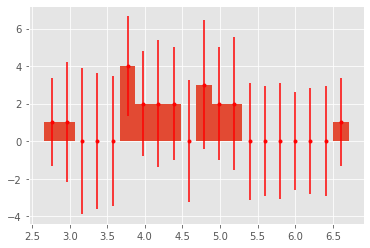

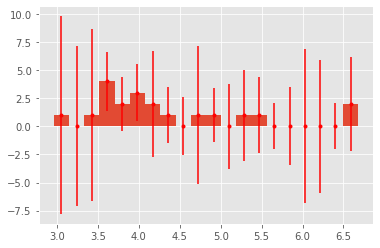

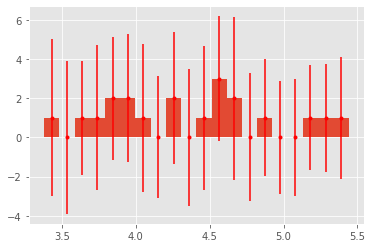

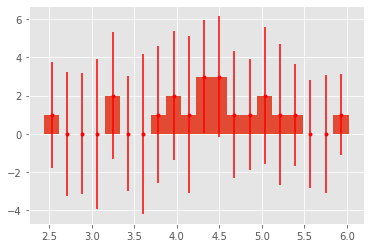

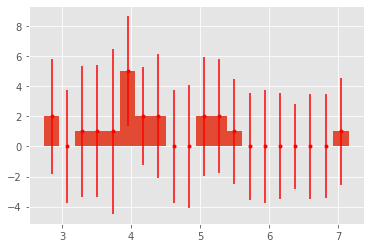

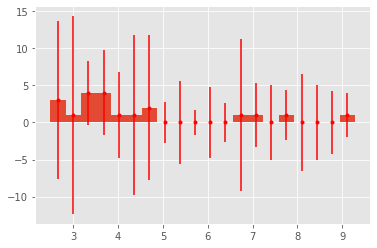

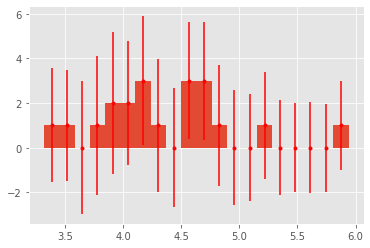

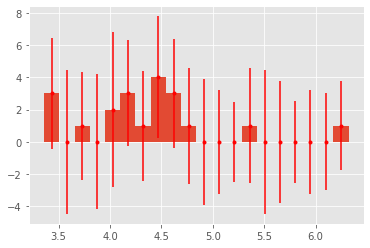

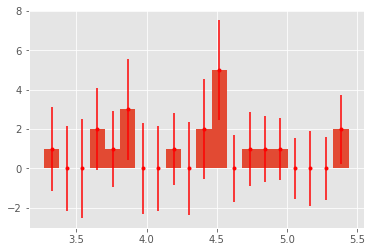

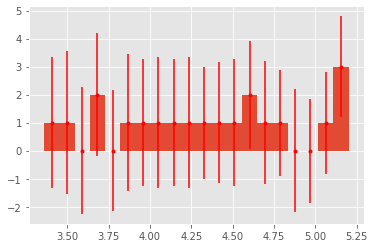

In [74]:
# input audio
folder_name = './codebook/train/'

classes = ['bass', 'brass', 'flute', 'guitar', 'keyboard', 'mallet', 'organ', 'reed', 'string','vocal']
K = 20
plt.style.use('ggplot')

for instrument in classes:
    file_name = folder_name + instrument+ '*.npy'
    filename = glob.glob(file_name)
    n_files = len(filename)
#     random_sample = np.random.randint(n_files)
#     histogram = np.load(filename[random_sample])
#     fig, ax = plt.subplots(sharex=True, figsize=(15,5))
#     plt.hist(histogram, bins=20)
    codebook = np.zeros((K, n_files))
    i=0
    for file in filename:
        codebook[:,i] = np.load(file)
        i = i+1
    mean_c = codebook.mean(axis=1)
    std_c = codebook.std(axis=1)
    entries, edges, _ = plt.hist(mean_c, bins=20)
    bin_centers = 0.5 * (edges[:-1] + edges[1:])

    # draw errobars, use the sqrt error. You can use what you want there
    # poissonian 1 sigma intervals would make more sense
    plt.errorbar(bin_centers, entries, yerr=std_c, fmt='r.')
    plt.show()